<a href="https://colab.research.google.com/github/Chinmaya54/CP_02_T16_MineCrafters/blob/Asish/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/cleaned_data1.csv")

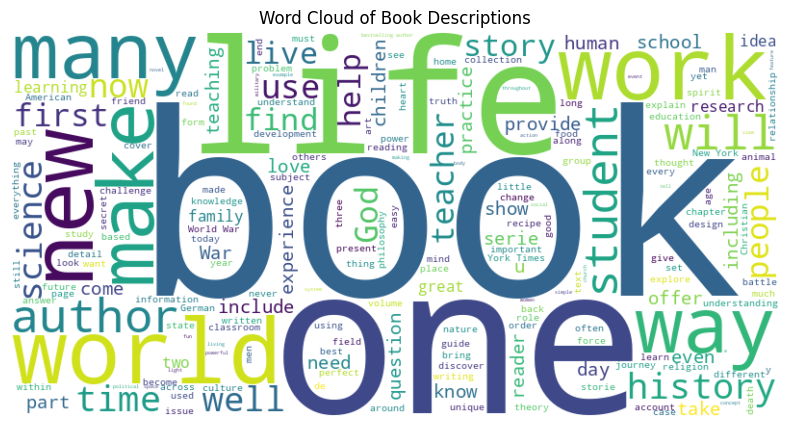

In [ ]:
from wordcloud import WordCloud

text = " ".join(str(description) for description in data['description'] if not pd.isnull(description))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Descriptions')
plt.show()


In [ ]:
pip install wordcloud pandas nltk


In [ ]:
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

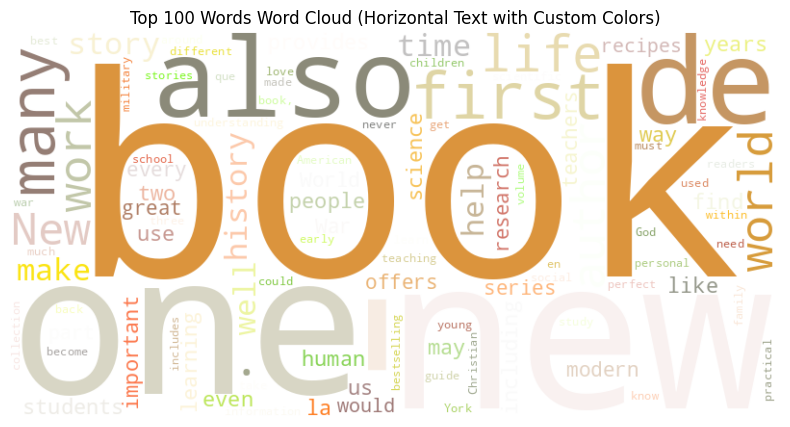

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


all_descriptions = " ".join(data['description'].dropna())


stop_words = set(stopwords.words('english'))  # Define stop words
words = all_descriptions.split()
filtered_words = [word for word in words if word.lower() not in stop_words]


from collections import Counter
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(100)
top_word_dict = dict(top_words)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mode='RGBA',
    relative_scaling=0.5
)
wordcloud.generate_from_frequencies(top_word_dict)
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl({np.random.randint(0, 100)}, {np.random.randint(0, 100)}%, {np.random.randint(50, 100)}%)"

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=color_func), interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Words Word Cloud (Horizontal Text with Custom Colors)')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px


data['lang'].fillna('Unknown', inplace=True)
data['rating-avg'].fillna(0, inplace=True)
fig = px.treemap(data,
                 path=['lang', 'imprint', 'rating-avg'],
                 values='bestsellers-rank',
                 color='bestsellers-rank',
                 color_continuous_scale='Viridis',
                 )

fig.update_layout(
    title='Treemap of Bestsellers Rank by Hierarchy',  # Set the plot title
    margin=dict(t=0, l=0, r=0, b=0),  # Adjust margins for better layout
)


fig.show()


In [ ]:
!pip install networkx
!pip install plotly


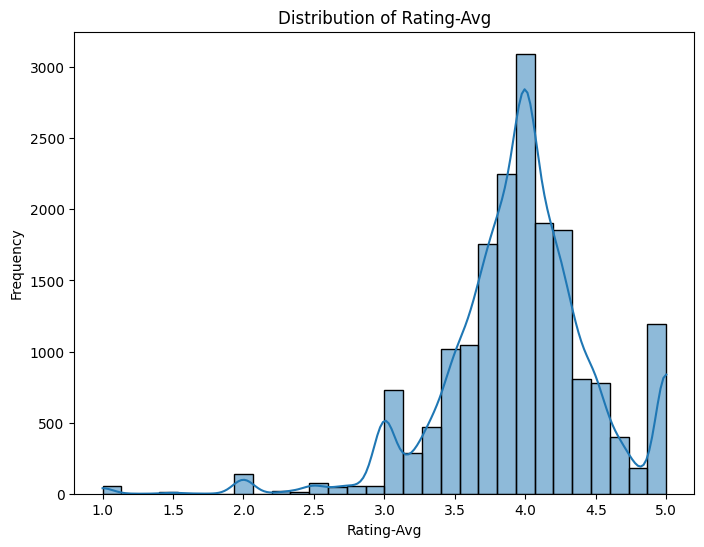

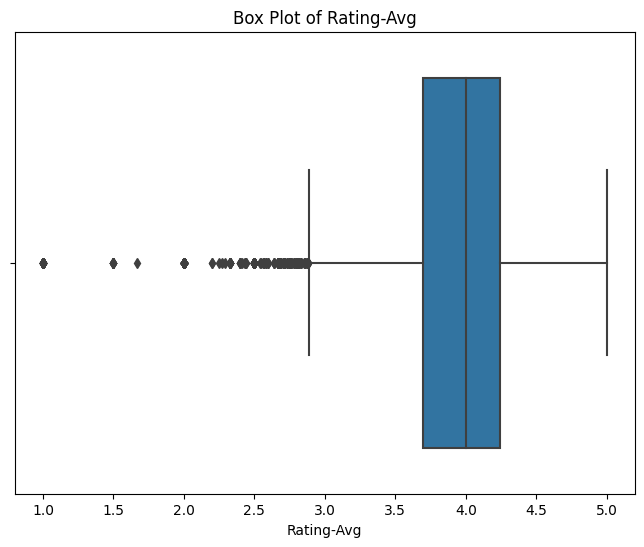

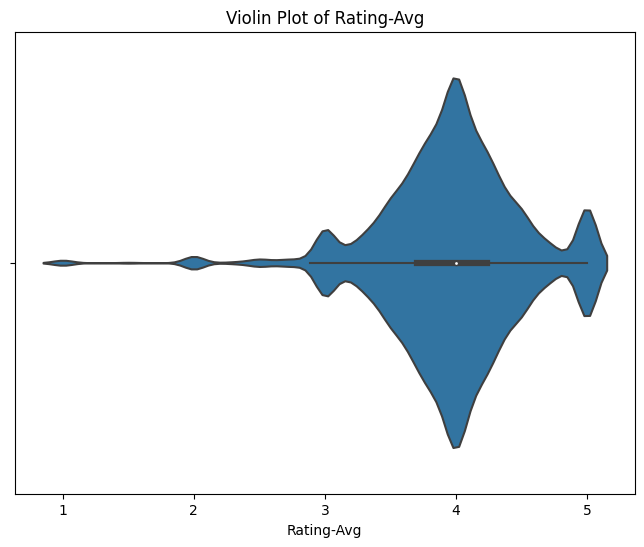

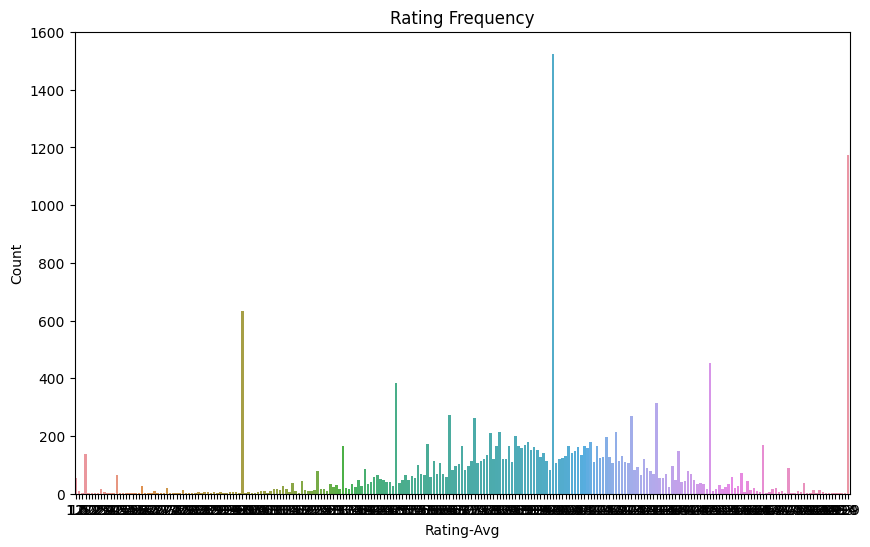

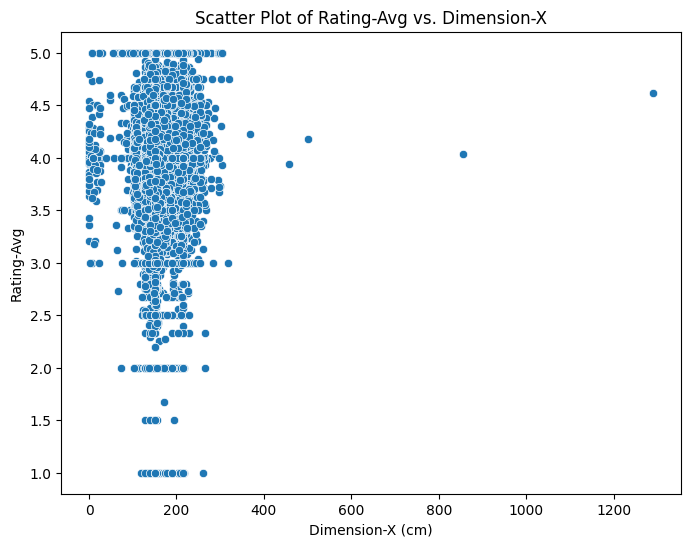

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'data' with your dataset)
# data = ...

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['rating-avg'], bins=30, kde=True)
plt.title('Distribution of Rating-Avg')
plt.xlabel('Rating-Avg')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['rating-avg'])
plt.title('Box Plot of Rating-Avg')
plt.xlabel('Rating-Avg')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['rating-avg'])
plt.title('Violin Plot of Rating-Avg')
plt.xlabel('Rating-Avg')
plt.show()

# Bar Plot (Rating Frequency)
plt.figure(figsize=(10, 6))
sns.countplot(x=data['rating-avg'])
plt.title('Rating Frequency')
plt.xlabel('Rating-Avg')
plt.ylabel('Count')
plt.show()

# Scatter Plot (e.g., with 'dimension-x')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['dimension-x'], y=data['rating-avg'])
plt.title('Scatter Plot of Rating-Avg vs. Dimension-X')
plt.xlabel('Dimension-X (cm)')
plt.ylabel('Rating-Avg')
plt.show()


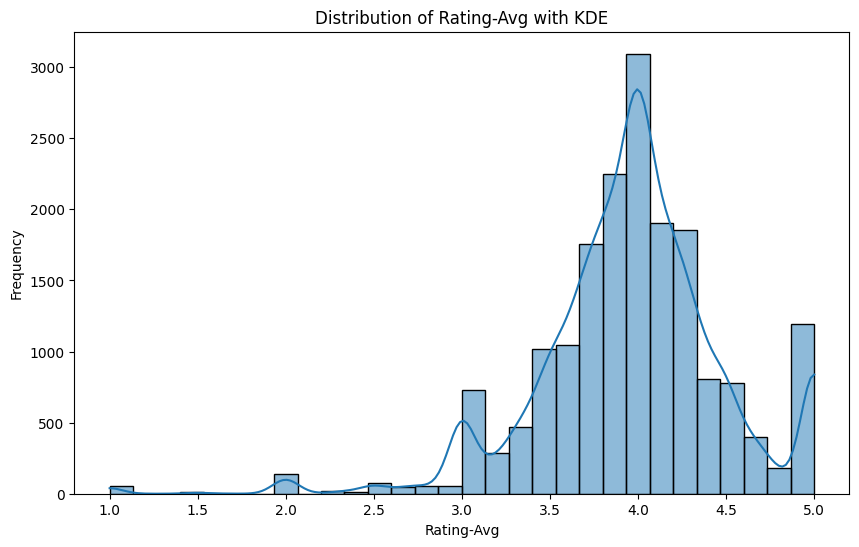

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data['rating-avg'], bins=30, kde=True)
plt.title('Distribution of Rating-Avg with KDE')
plt.xlabel('Rating-Avg')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x800 with 0 Axes>

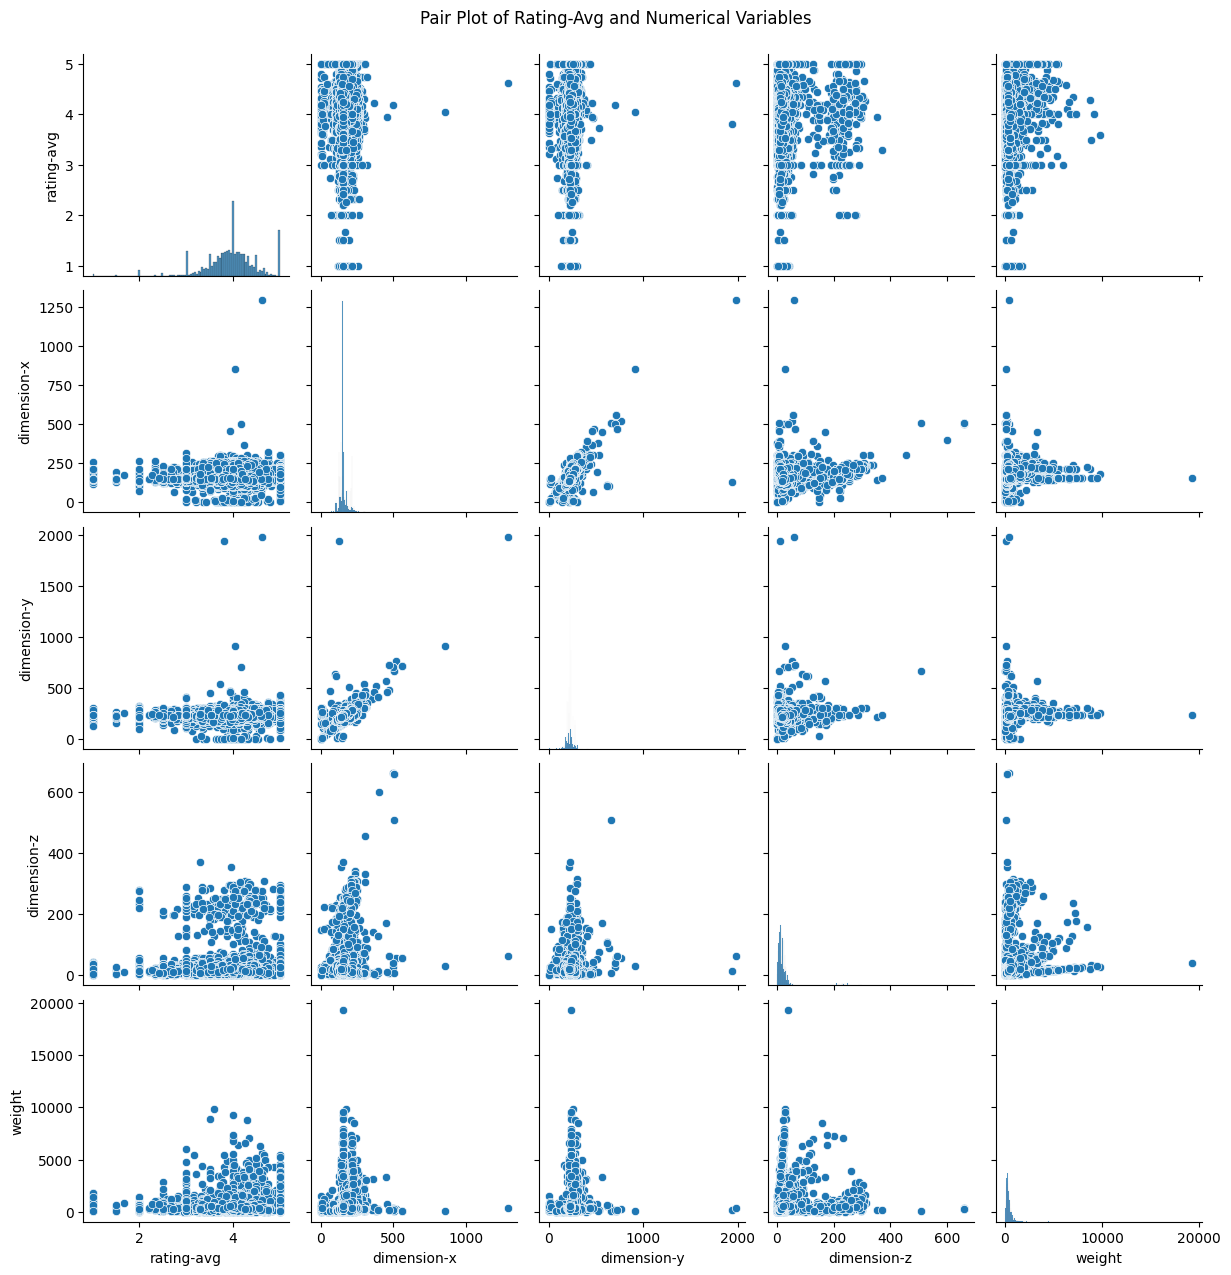

In [ ]:

numerical_data = data[['rating-avg', 'dimension-x', 'dimension-y', 'dimension-z', 'weight']]

plt.figure(figsize=(12, 8))
sns.pairplot(numerical_data)
plt.suptitle('Pair Plot of Rating-Avg and Numerical Variables', y=1.02)
plt.show()


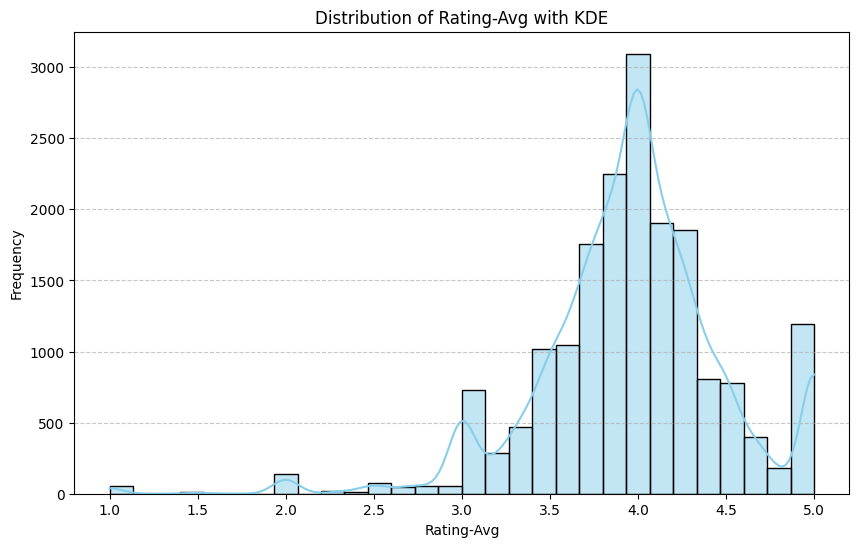

In [ ]:

# Assuming 'data' is your dataset and 'rating-avg' is the column containing average ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating-avg'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rating-Avg with KDE')
plt.xlabel('Rating-Avg')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


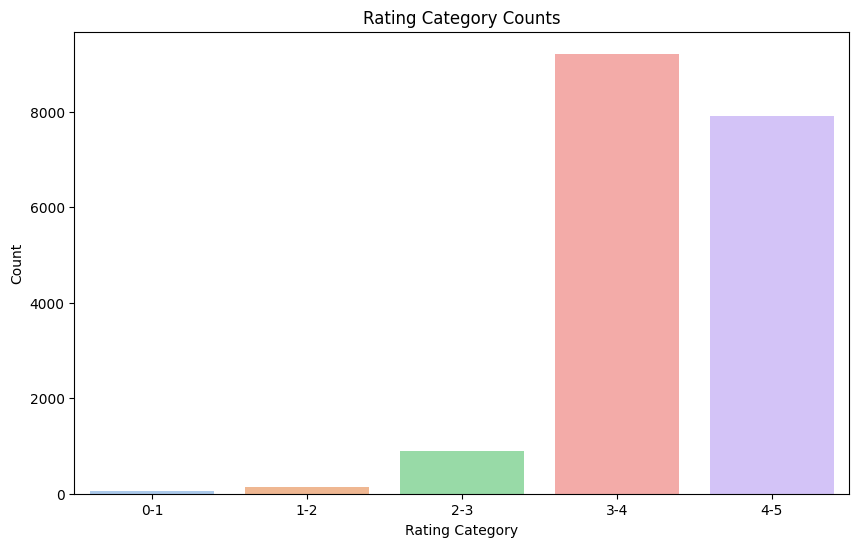

In [ ]:

bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
data['Rating-Category'] = pd.cut(data['rating-avg'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating-Category', data=data, palette='pastel')
plt.title('Rating Category Counts')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()


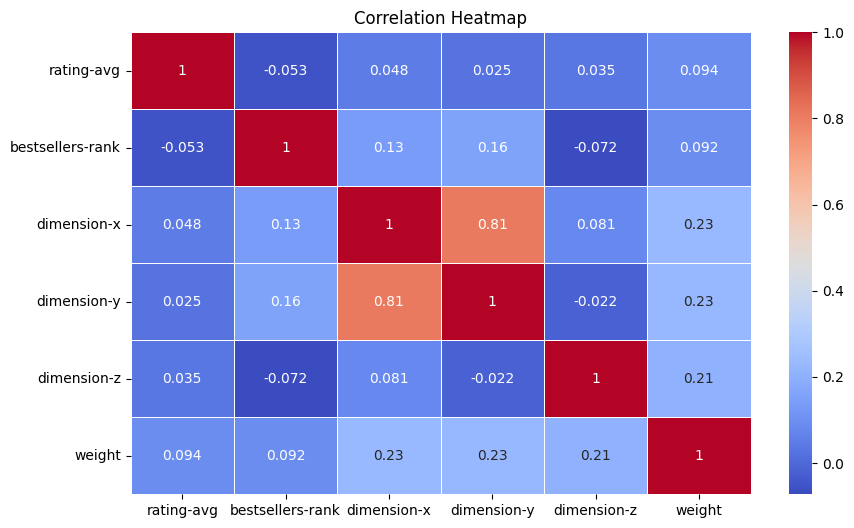

In [ ]:

numerical_columns = ['rating-avg','bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z', 'weight']

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


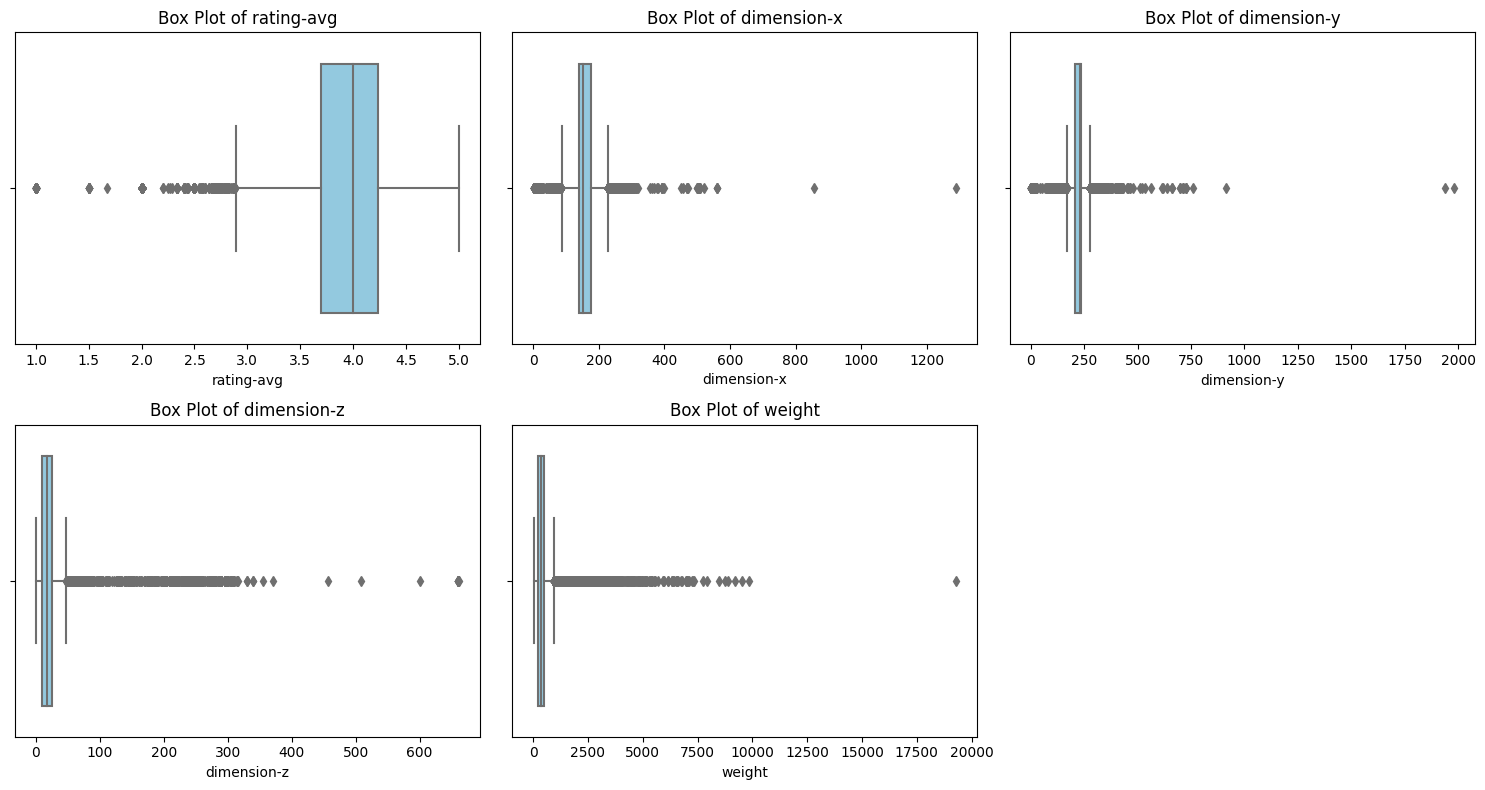

In [ ]:

numerical_columns = ['rating-avg', 'dimension-x', 'dimension-y', 'dimension-z', 'weight']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


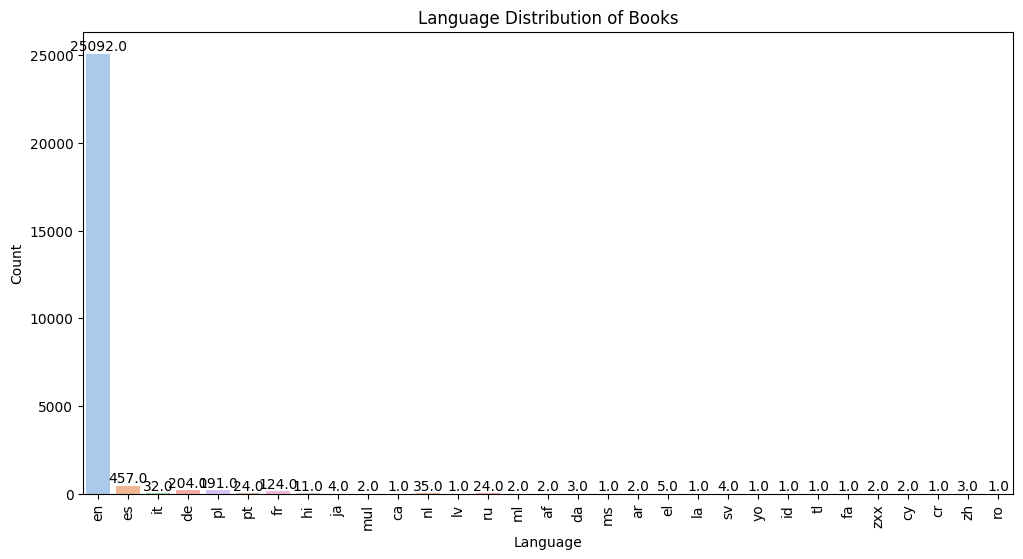

In [ ]:

language_counts = data['lang'].value_counts()

plt.figure(figsize=(12, 6))

ax = sns.countplot(data=data, x='lang', palette='pastel')
plt.title('Language Distribution of Books')
plt.xlabel('Language')
plt.ylabel('Count')

plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


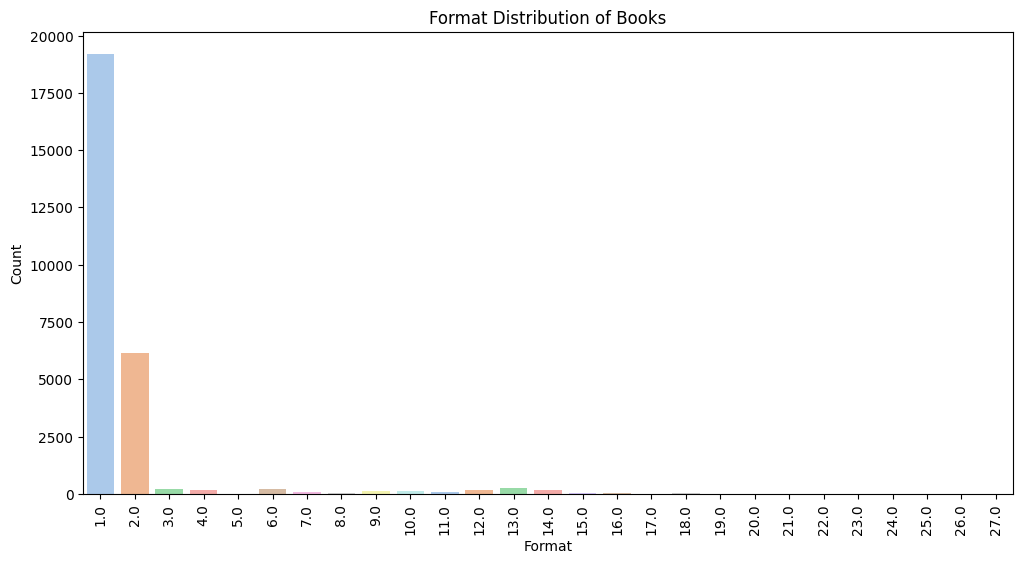

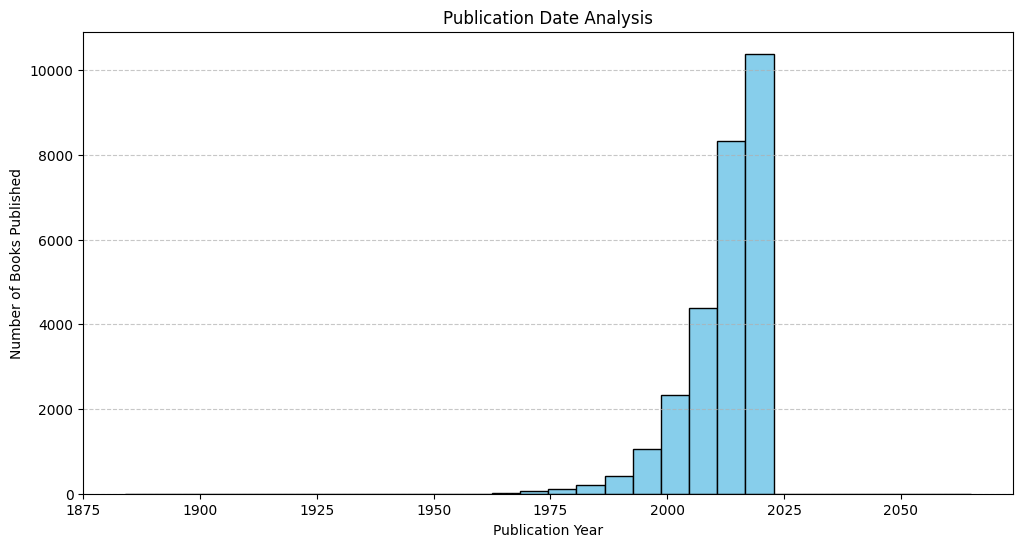

In [ ]:

data['publication-date'] = pd.to_datetime(data['publication-date'])

data['publication-year'] = data['publication-date'].dt.year

plt.figure(figsize=(12, 6))
plt.hist(data['publication-year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Publication Date Analysis')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books Published')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


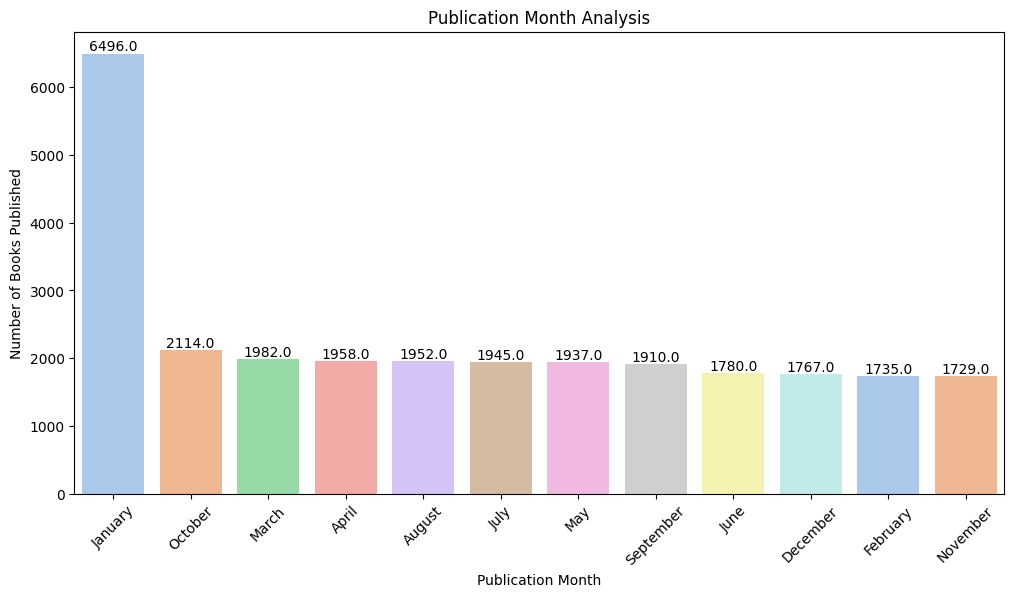

In [ ]:
data['publication-date'] = pd.to_datetime(data['publication-date'])

data['publication-year'] = data['publication-date'].dt.year
data['publication-month'] = data['publication-date'].dt.month_name()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='publication-month', palette='pastel', order=data['publication-month'].value_counts().index)
plt.title('Publication Month Analysis')
plt.xlabel('Publication Month')
plt.ylabel('Number of Books Published')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


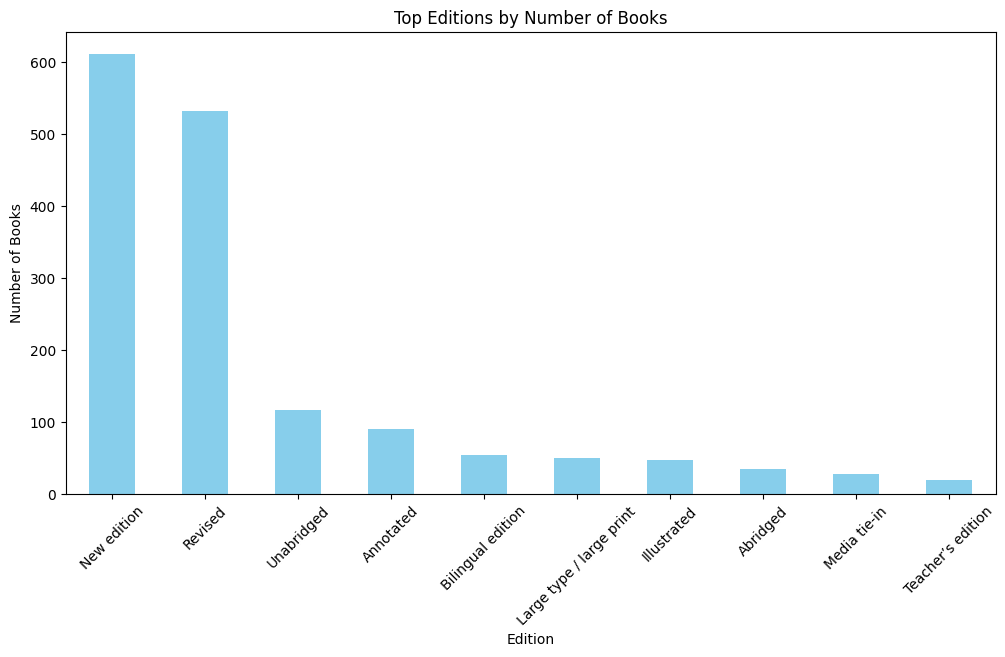

In [ ]:
edition_counts = data['edition'].value_counts()
top_editions = edition_counts.head(10)
plt.figure(figsize=(12, 6))
top_editions.plot(kind='bar', color='skyblue')
plt.title('Top Editions by Number of Books')
plt.xlabel('Edition')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


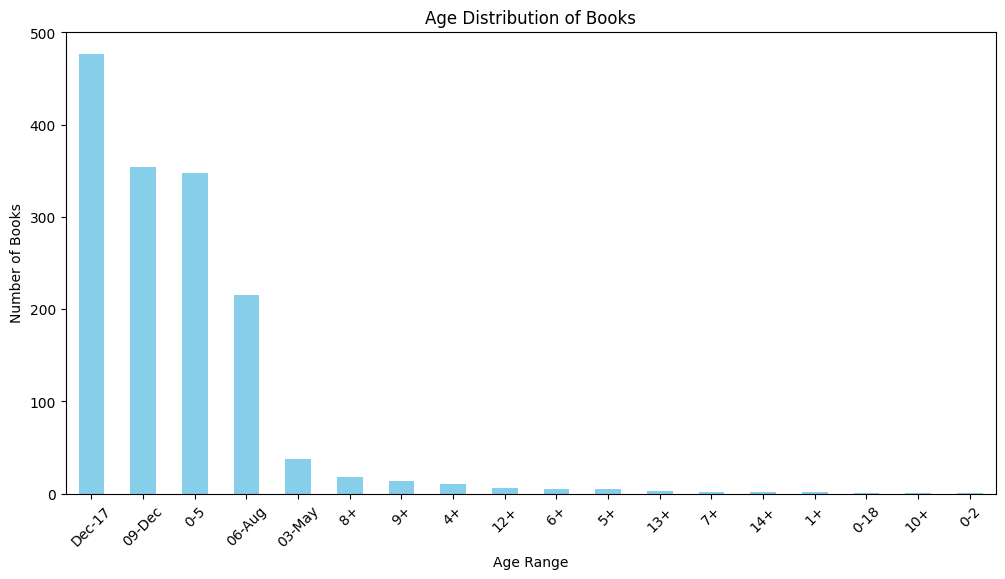

In [ ]:
age_counts = data['for-ages'].value_counts()
plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Age Distribution of Books')
plt.xlabel('Age Range')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


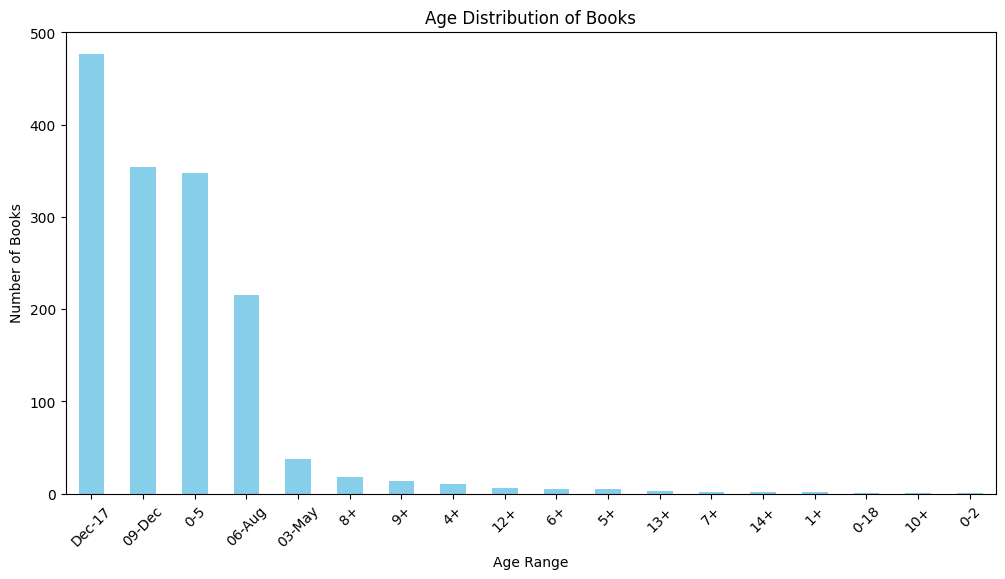

In [ ]:
data

authors  bestsellers-rank  \
0                 1           49848.0   
1              2, 3          115215.0   
2                 4           11732.0   
3        5, 6, 7, 8          114379.0   
4                 9           98413.0   
...             ...               ...   
27323  28251, 28252          754979.0   
27324         28253          701883.0   
27325         28254          926336.0   
27326         28255          741018.0   
27327         28256          934272.0   

                                           categories  \
0         214, 220, 237, 2646, 2647, 2659, 2660, 2679   
1                                           235, 3386   
2                                358, 2630, 360, 2632   
3                                     377, 2978, 2980   
4                                          2813, 2980   
...                                               ...   
27323  2645, 2660, 2689, 1531, 1541, 1558, 1559, 1864   
27324                           163, 3278, 2649, 1530   
27325                                      1532, 1562   
27326                    1530, 1531, 1719, 1755, 1766   
27327                                      1520, 1521   

                                             description  dimension-x  \
0      SOLDIER FIVE is an elite soldier's explosive m...        129.0   
1      John Moran and Carl Williams were the two bigg...        127.0   
2      Sir Phillip knew that Eloise Bridgerton was a ...        150.0   
3      The Third Book of General Ignorance  gathers t...        153.0   
4      The Try Guys deliver their first book-an inspi...        191.0   
...                                                  ...          ...   
27323  From April through December of 1945, ten of Na...        178.0   
27324  This volume explores the development of the ea...        156.0   
27325  To those of us who are not mathematicians or p...        152.0   
27326  Like many apparently simple devices, the verti...        152.0   
27327  Debate over the nature of science has recently...        153.0   

       dimension-y  dimension-z      edition    edition-statement for-ages  \
0            198.0        20.00          NaN                  NaN      NaN   
1            203.2        25.40          NaN                  NaN      NaN   
2            224.0        28.00  New edition                  NaN      NaN   
3            234.0        24.00          NaN  Export - Airside ed      NaN   
4            240.0        29.00          NaN                  NaN      NaN   
...            ...          ...          ...                  ...      ...   
27323        254.0        20.32      Revised         2nd ed. 2001      NaN   
27324        235.0        20.83  New edition          New edition      NaN   
27325        229.0        13.00          NaN                  NaN      NaN   
27326        229.0        27.43          NaN          Revised ed.      NaN   
27327        227.0        21.00  New edition          New edition      NaN   

       format                       imprint lang  publication-date  \
0         1.0         Mainstream Publishing   en  14-10-2004 00:00   
1         1.0                           NaN   en  13-03-2009 00:00   
2         1.0                           NaN   es  30-04-2020 00:00   
3         1.0                           NaN   en  01-10-2015 00:00   
4         2.0  HarperCollins Publishers Ltd   en  18-06-2019 00:00   
...       ...                           ...  ...               ...   
27323     1.0                           NaN   en  01-01-2001 00:00   
27324     1.0                           NaN   en  30-09-2002 00:00   
27325     1.0                           NaN   en  01-03-2011 00:00   
27326     1.0                           NaN   en  01-01-2003 00:00   
27327     1.0   University of Chicago Press   en  15-05-1990 00:00   

       publication-place  rating-avg  rating-count  \
0                    NaN        4.03         292.0   
1                    NaN        3.60         335.0   
2                

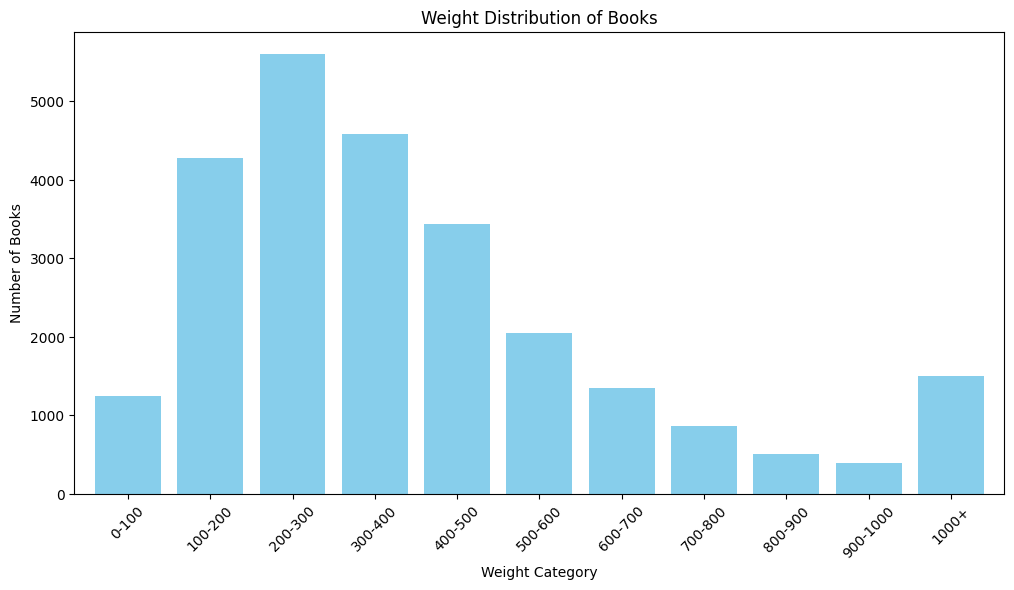

In [ ]:
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

weight_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
weight_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+']

data['weight_category'] = pd.cut(data['weight'], bins=weight_bins, labels=weight_labels, right=False)

data = data.dropna(subset=['weight_category'])

weight_category_counts = data['weight_category'].value_counts().reindex(weight_labels, fill_value=0)
plt.figure(figsize=(12, 6))
weight_category_counts.plot(kind='bar', color='skyblue', width=0.8)
plt.title('Weight Distribution of Books')
plt.xlabel('Weight Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


<ipython-input-43-01d7672f52df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


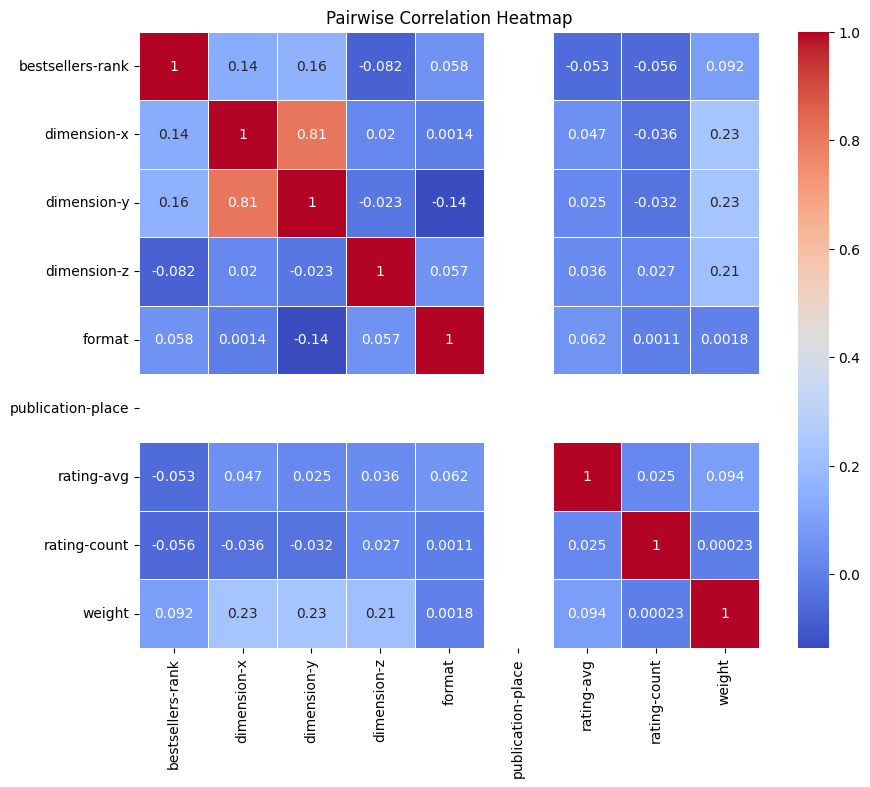

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()


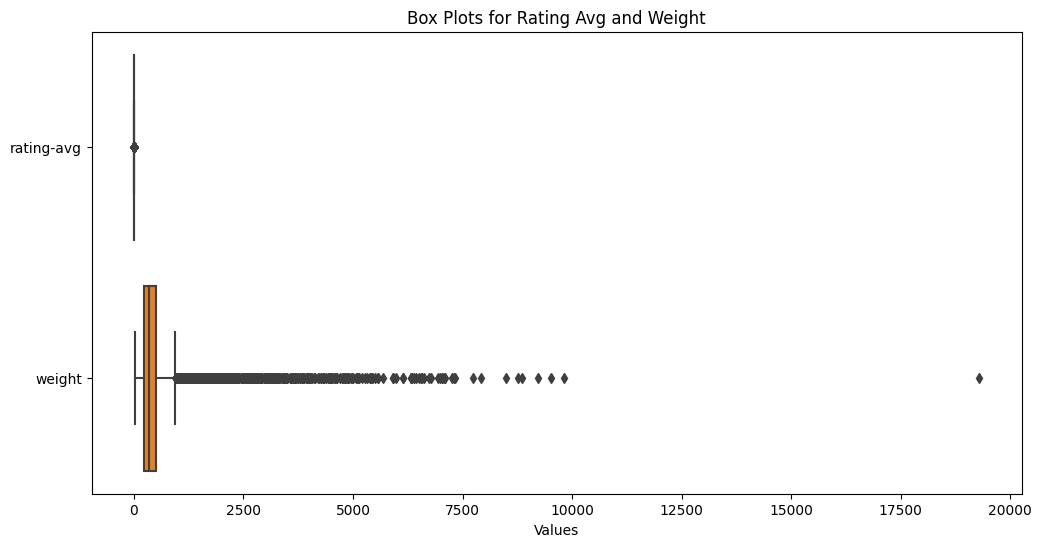

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['rating-avg', 'weight']], orient='h')
plt.title('Box Plots for Rating Avg and Weight')
plt.xlabel('Values')
plt.show()


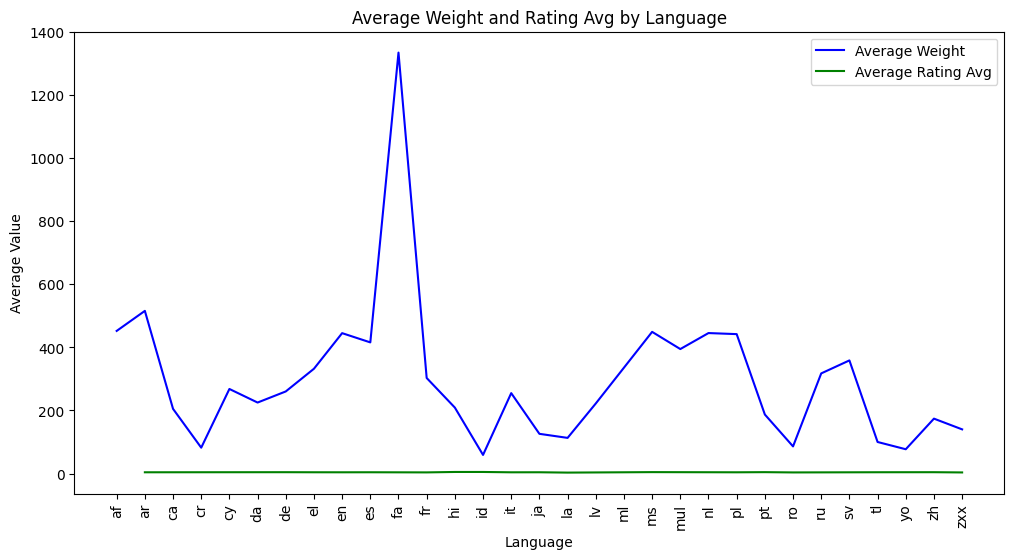

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
avg_weight = data.groupby('lang')['weight'].mean().reset_index()
avg_rating = data.groupby('lang')['rating-avg'].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=avg_weight, x='lang', y='weight', label='Average Weight', color='blue')
sns.lineplot(data=avg_rating, x='lang', y='rating-avg', label='Average Rating Avg', color='green')
ax.set_xlabel('Language')
ax.set_ylabel('Average Value')
ax.set_title('Average Weight and Rating Avg by Language')
ax.legend()
plt.xticks(rotation=90)
plt.show()


<ipython-input-59-a403356dc629>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(avg_weight['lang'], rotation=90)
<ipython-input-59-a403356dc629>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(avg_rating['lang'], rotation=90)


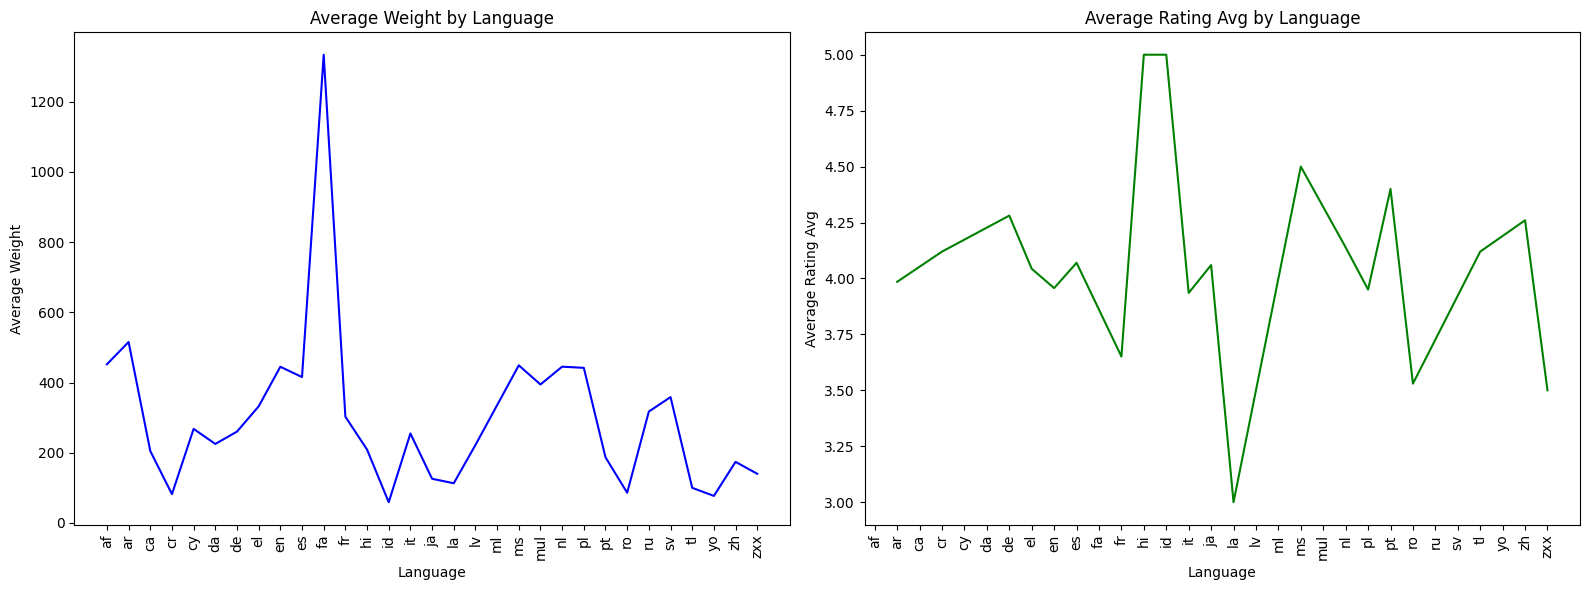

In [ ]:
avg_weight = data.groupby('lang')['weight'].mean().reset_index()
avg_rating = data.groupby('lang')['rating-avg'].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.lineplot(data=avg_weight, x='lang', y='weight', ax=axes[0], color='blue')
axes[0].set_xlabel('Language')
axes[0].set_ylabel('Average Weight')
axes[0].set_title('Average Weight by Language')
axes[0].set_xticklabels(avg_weight['lang'], rotation=90)
sns.lineplot(data=avg_rating, x='lang', y='rating-avg', ax=axes[1], color='green')
axes[1].set_xlabel('Language')
axes[1].set_ylabel('Average Rating Avg')
axes[1].set_title('Average Rating Avg by Language')
axes[1].set_xticklabels(avg_rating['lang'], rotation=90)
plt.tight_layout()
plt.show()


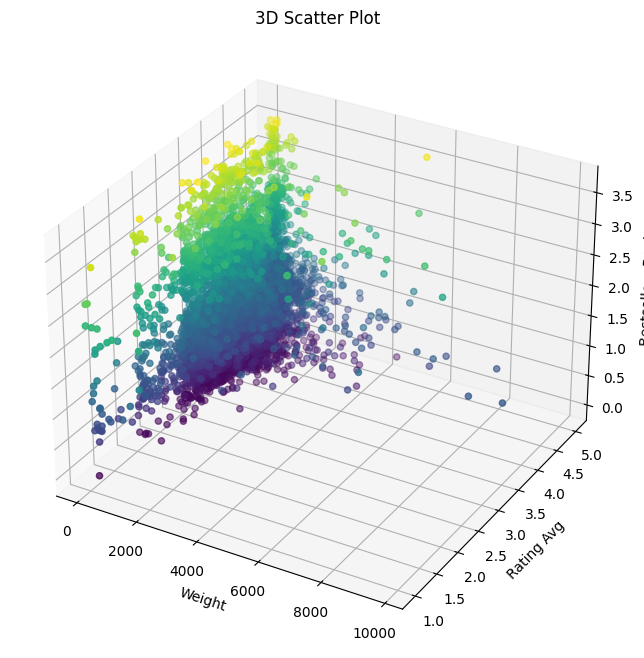

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['weight'], data['rating-avg'], data['bestsellers-rank'], c=data['bestsellers-rank'], cmap='viridis')
ax.set_xlabel('Weight')
ax.set_ylabel('Rating Avg')
ax.set_zlabel('Bestsellers Rank')
ax.set_title('3D Scatter Plot')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your dataset

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='format', y='rating-avg', hue='weight', ci=None)
plt.xlabel('Format')
plt.ylabel('Average Rating Avg')
plt.title('Comparison of Rating Avg and Weight by Format')
plt.xticks(rotation=45)
plt.legend(title='Weight')
plt.show()


KeyboardInterrupt: ignored

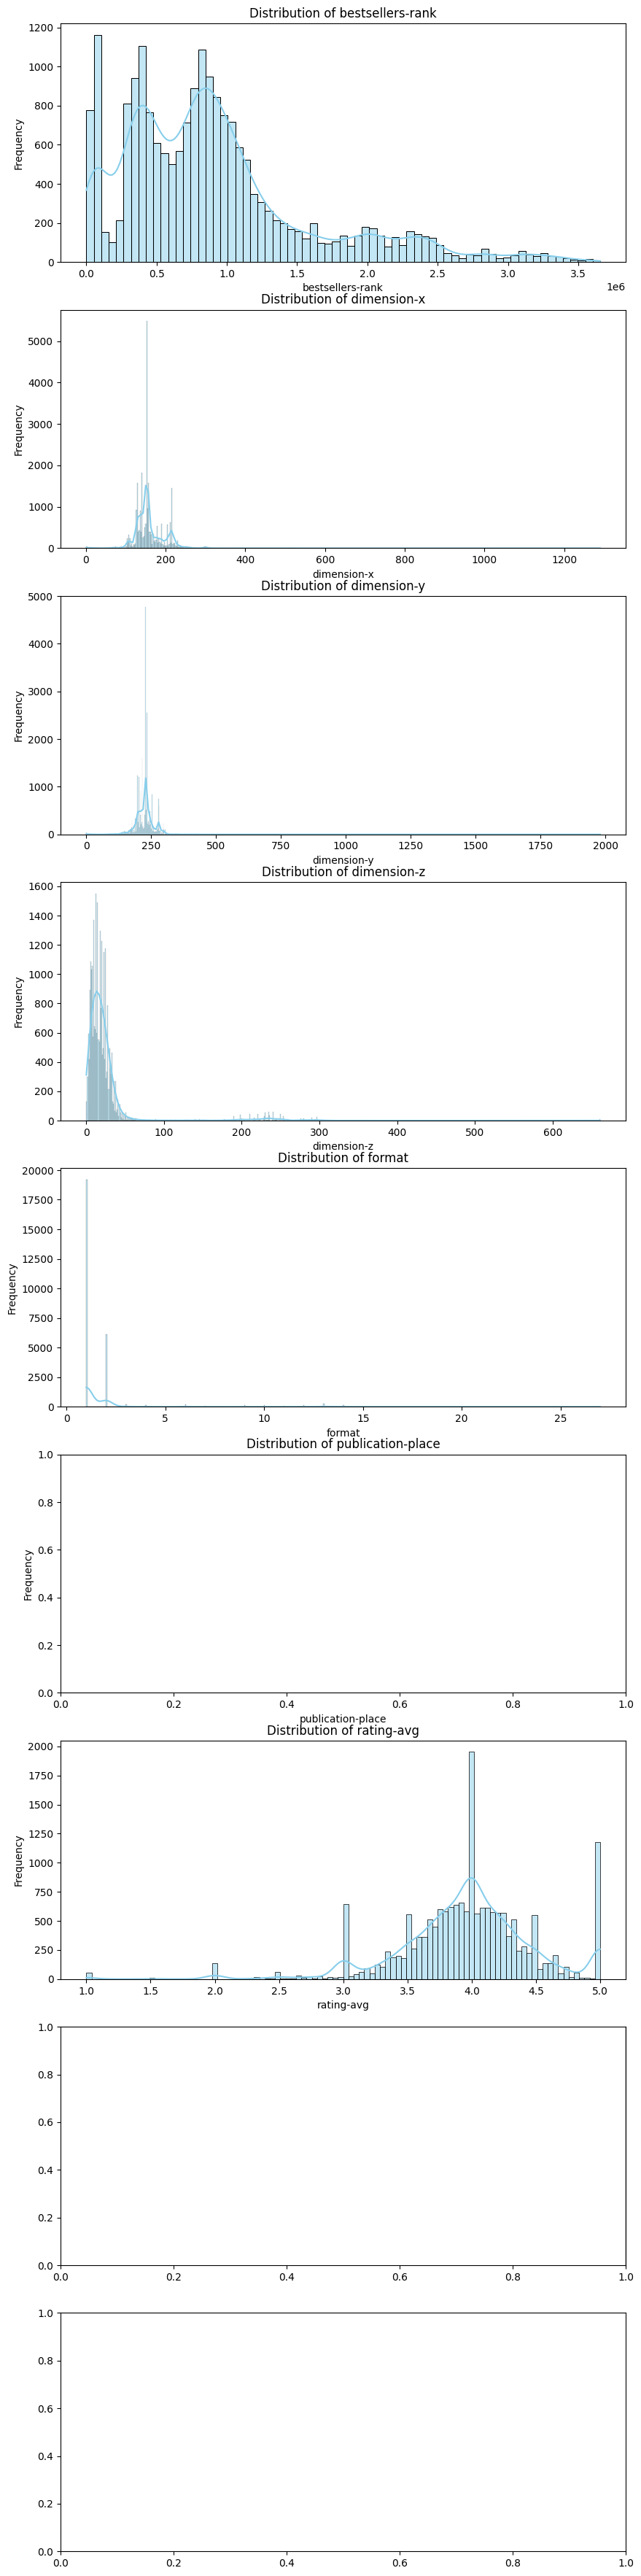

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns from the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Set the number of subplots based on the number of numerical columns
num_subplots = len(numerical_columns.columns)
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 5 * num_subplots))

# Plot histograms with KDE lines for each numerical column
for i, col in enumerate(numerical_columns.columns):
    ax = axes[i]
    sns.histplot(data=data, x=col, kde=True, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: ignored

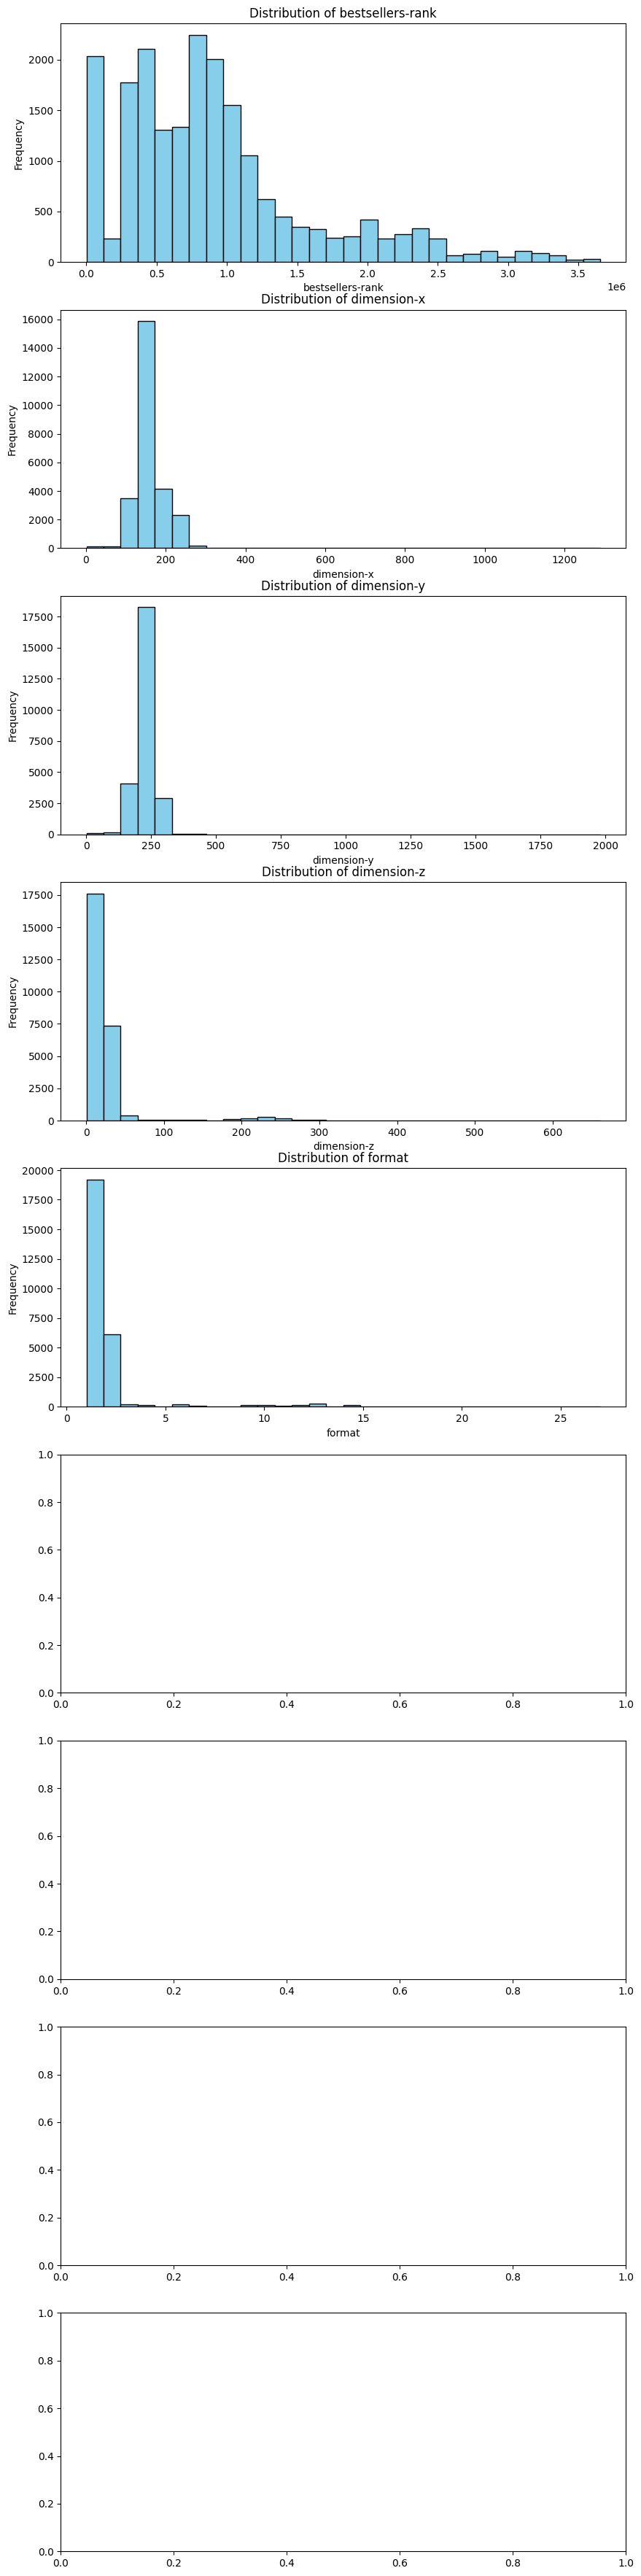

In [ ]:
import matplotlib.pyplot as plt

# Select the numerical columns from the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Set the number of subplots based on the number of numerical columns
num_subplots = len(numerical_columns.columns)
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 5 * num_subplots))

# Plot histograms for each numerical column without KDE lines
for i, col in enumerate(numerical_columns.columns):
    ax = axes[i]
    ax.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()


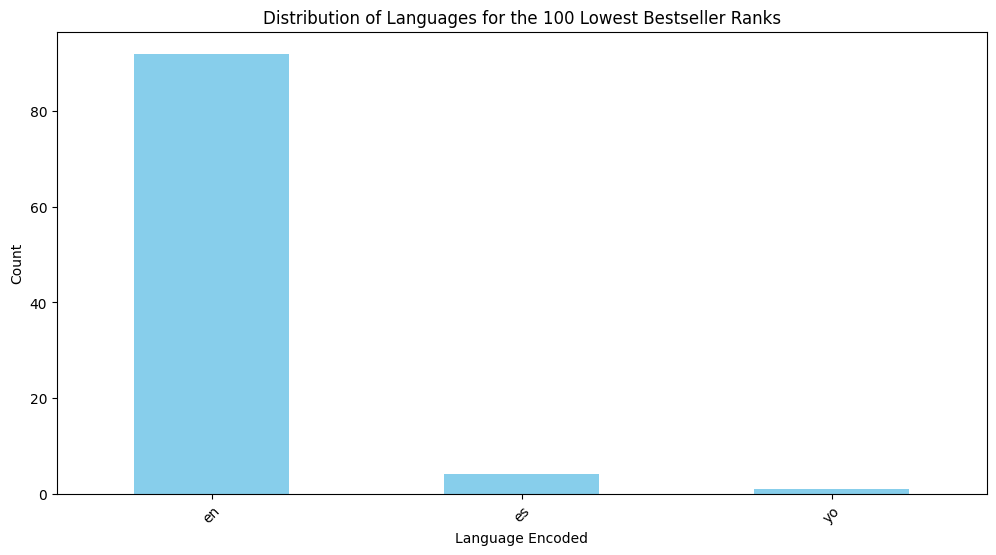

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to select the 100 lowest bestseller ranks
lowest_bestsellers = data.nsmallest(100, 'bestsellers-rank')

# Categorize the filtered data based on the 'lang_encoded' column
language_counts = lowest_bestsellers['lang'].value_counts()

# Create a bar plot to visualize the distribution of languages
plt.figure(figsize=(12, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Languages for the 100 Lowest Bestseller Ranks')
plt.xlabel('Language Encoded')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


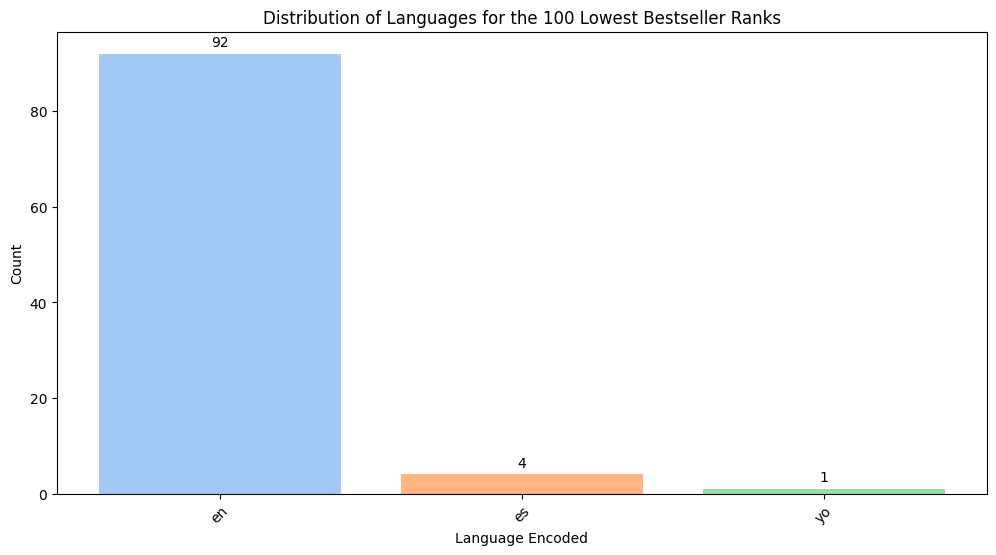

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

# Filter the dataset to select the 100 lowest bestseller ranks
lowest_bestsellers = data.nsmallest(100, 'bestsellers-rank')

# Categorize the filtered data based on the 'lang_encoded' column
language_counts = lowest_bestsellers['lang'].value_counts()

# Create a color palette for the bars
colors = sns.color_palette("pastel", len(language_counts))

# Create a bar plot to visualize the distribution of languages
plt.figure(figsize=(12, 6))
bars = plt.bar(language_counts.index, language_counts, color=colors)

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Languages for the 100 Lowest Bestseller Ranks')
plt.xlabel('Language Encoded')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


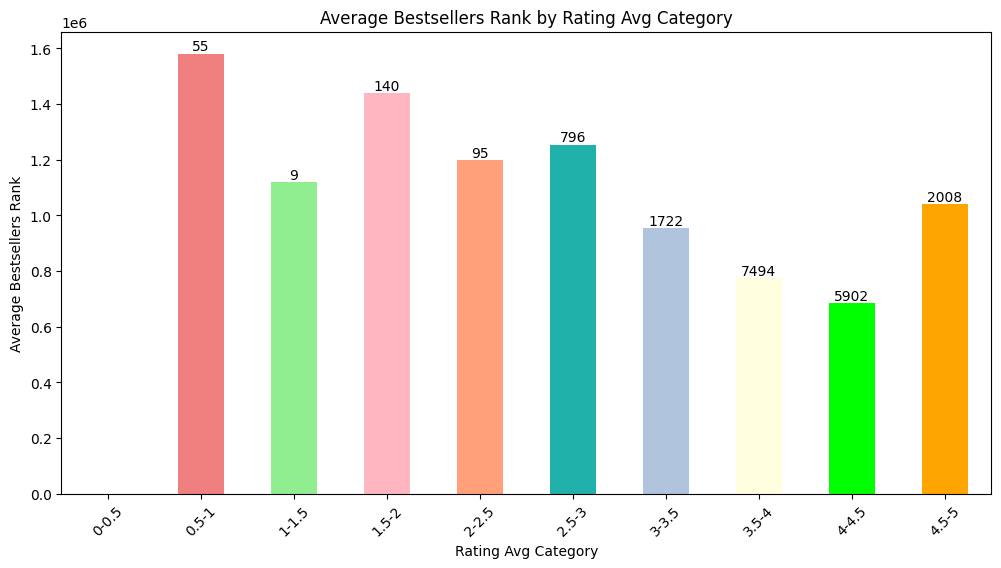

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the rating ranges and labels
rating_ranges = [(0, 0.5), (0.5, 1), (1, 1.5), (1.5, 2), (2, 2.5), (2.5, 3), (3, 3.5), (3.5, 4), (4, 4.5), (4.5, 5)]
rating_labels = [f'{start}-{end}' for start, end in rating_ranges]

# Categorize the data based on 'rating-avg' and calculate the mean 'bestsellers-rank'
data['rating_category'] = pd.cut(data['rating-avg'], bins=[start for start, _ in rating_ranges] + [5], labels=rating_labels)

average_bestsellers_rank = data.groupby('rating_category')['bestsellers-rank'].mean()
count_per_category = data['rating_category'].value_counts().reindex(rating_labels, fill_value=0)

# Define colors for bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon',
          'lightseagreen', 'lightsteelblue', 'lightyellow', 'lime', 'orange']

# Create a bar plot with count values on top of bars
plt.figure(figsize=(12, 6))
bar_plot = average_bestsellers_rank.plot(kind='bar', color=colors)
plt.xlabel('Rating Avg Category')
plt.ylabel('Average Bestsellers Rank')
plt.title('Average Bestsellers Rank by Rating Avg Category')
plt.xticks(rotation=45)

# Add count values on top of bars
for i, value in enumerate(count_per_category):
    plt.text(i, average_bestsellers_rank[i] + 0.1, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


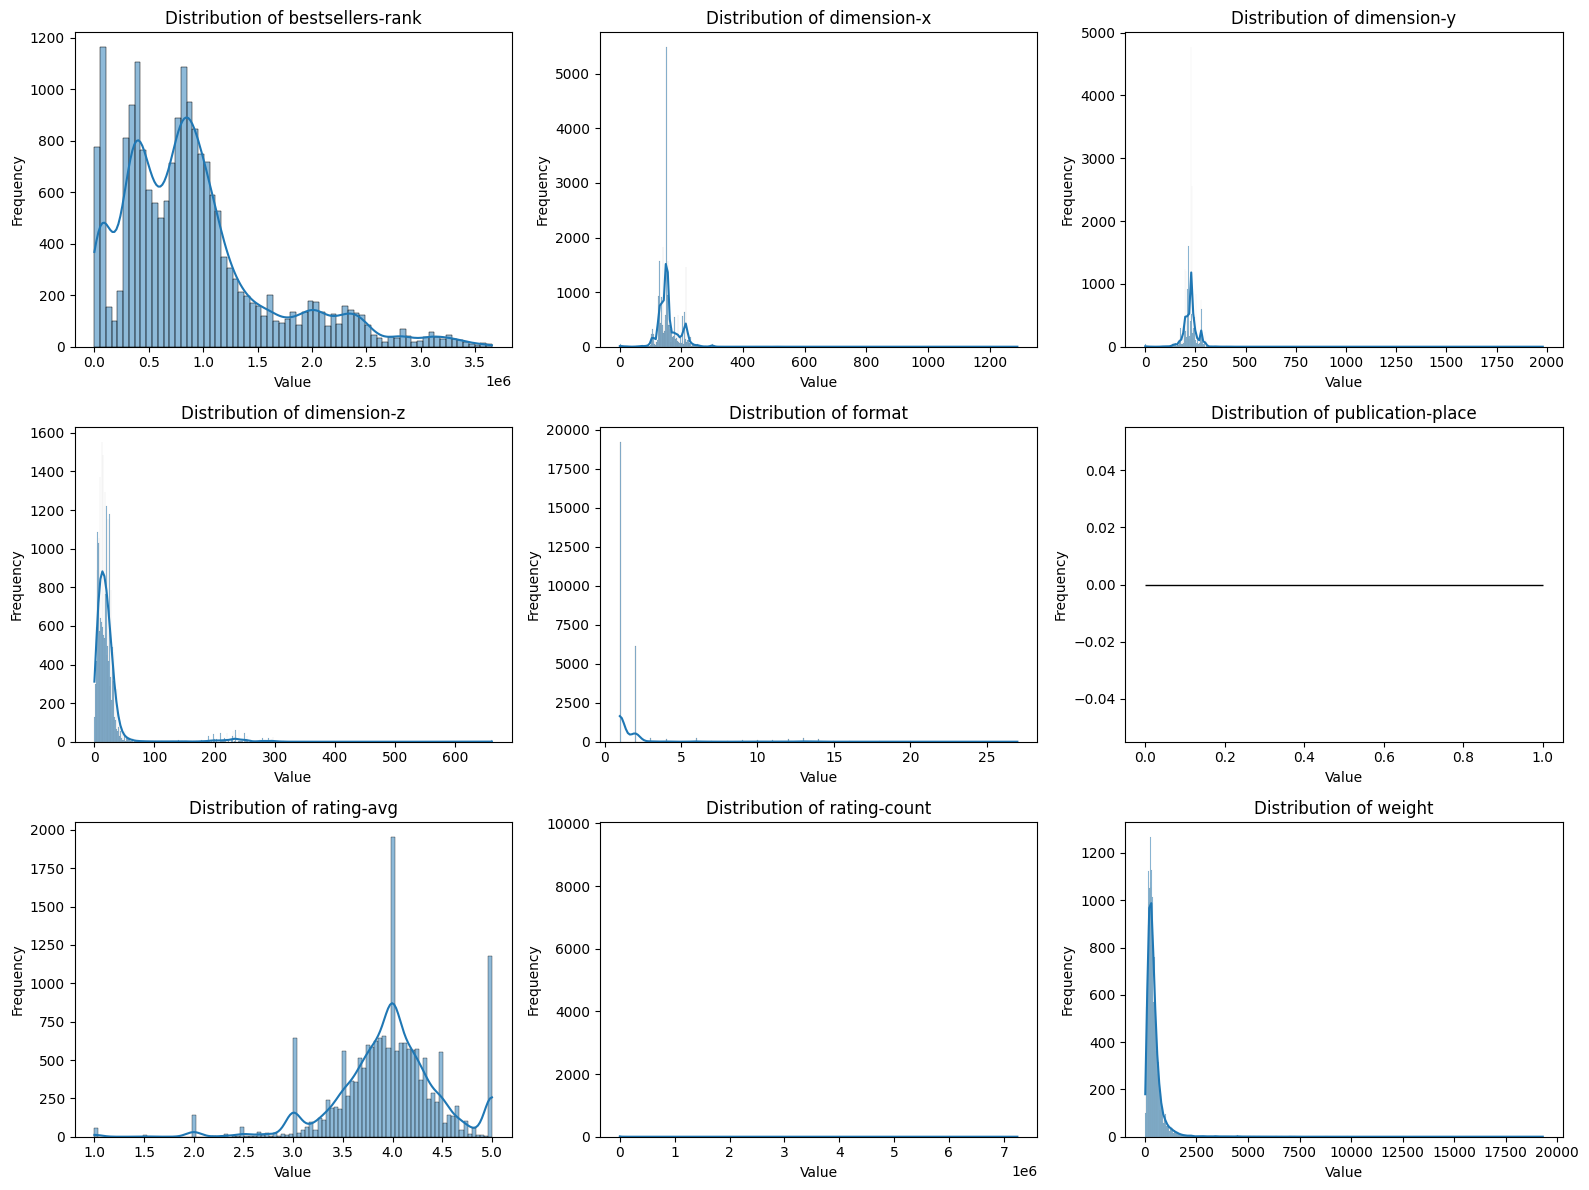

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns from your dataset
numerical_columns = data.select_dtypes(include=['int', 'float'])

# Define the number of subplots per row
num_plots_per_row = 3
num_cols = len(numerical_columns.columns)
num_rows = (num_cols - 1) // num_plots_per_row + 1

# Set the figure size
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(16, 4 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over numerical columns and create distribution plots
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i]
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove empty subplots
for i in range(num_cols, num_plots_per_row * num_rows):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


<ipython-input-5-3a0ae04fca01>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')  # You can choose any colormap you prefer


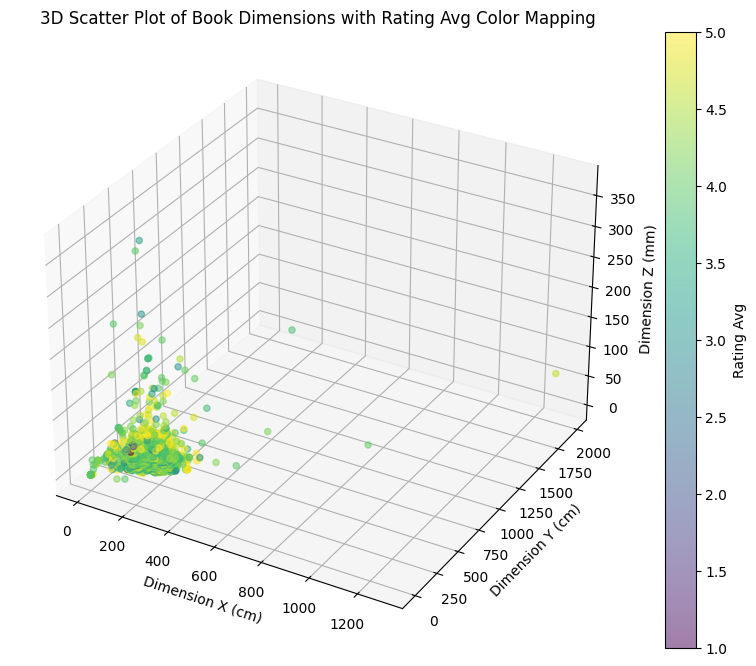

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = data['dimension-x']
y = data['dimension-y']
z = data['dimension-z']
colormap = plt.cm.get_cmap('viridis')
norm = plt.Normalize(data['rating-avg'].min(), data['rating-avg'].max())
sc = ax.scatter(x, y, z, c=data['rating-avg'], cmap=colormap, norm=norm, marker='o', alpha=0.5)
ax.set_xlabel('Dimension X (cm)')
ax.set_ylabel('Dimension Y (cm)')
ax.set_zlabel('Dimension Z (mm)')

cbar = plt.colorbar(sc)
cbar.set_label('Rating Avg')
plt.title('3D Scatter Plot of Book Dimensions with Rating Avg Color Mapping')
plt.show()


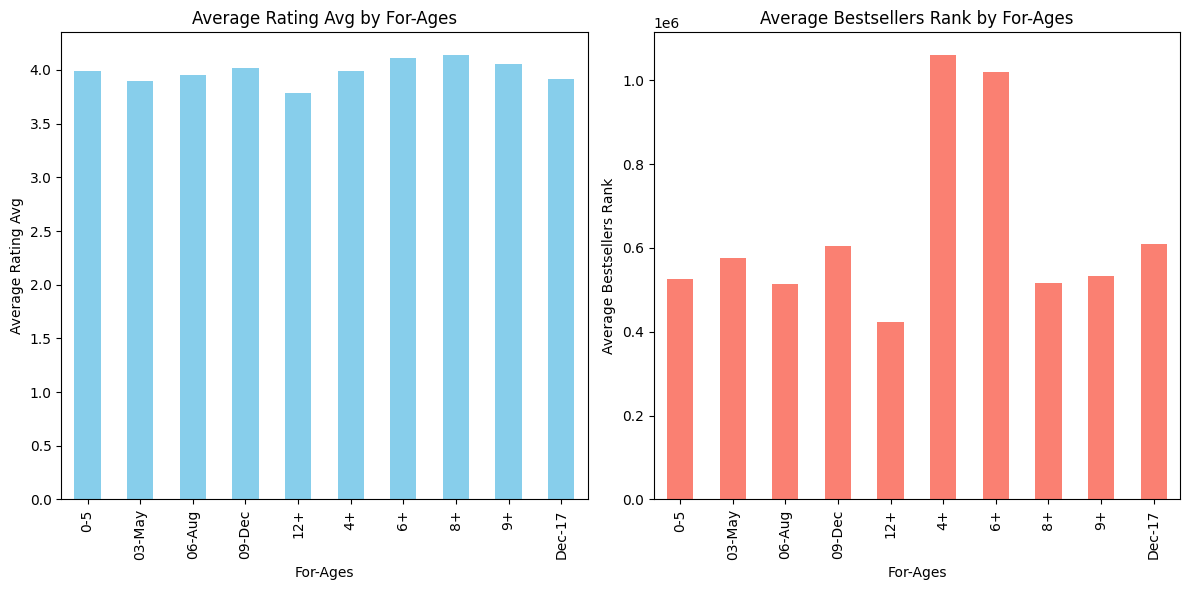

In [ ]:

top_for_ages = data['for-ages'].value_counts().head(10).index

filtered_data = data[data['for-ages'].isin(top_for_ages)]
average_rating = filtered_data.groupby('for-ages')['rating-avg'].mean()
average_rank = filtered_data.groupby('for-ages')['bestsellers-rank'].mean()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
average_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating Avg by For-Ages')
plt.xlabel('For-Ages')
plt.ylabel('Average Rating Avg')
plt.subplot(1, 2, 2)
average_rank.plot(kind='bar', color='salmon')
plt.title('Average Bestsellers Rank by For-Ages')
plt.xlabel('For-Ages')
plt.ylabel('Average Bestsellers Rank')
plt.tight_layout()
plt.show()


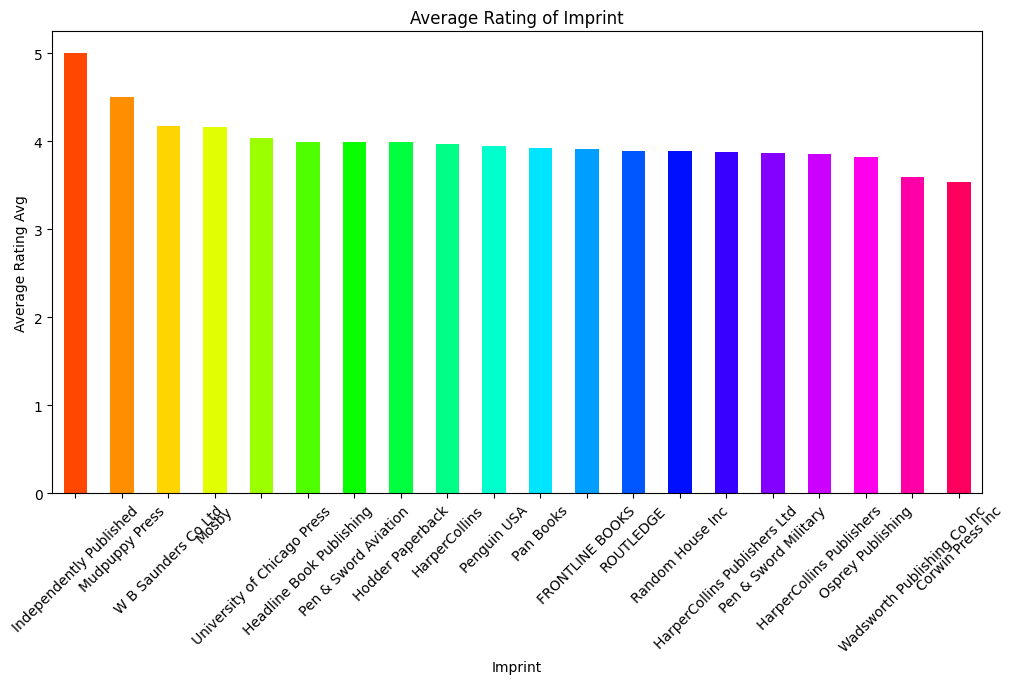

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
top_imprint = data['imprint'].value_counts().head(20).index
filtered_data = data[data['imprint'].isin(top_imprint)]
average_rating = filtered_data.groupby('imprint')['rating-avg'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
colors = sns.color_palette("hsv", len(average_rating))
average_rating.plot(kind='bar', color=colors)
plt.title('Average Rating of Imprint')
plt.xlabel('Imprint')
plt.ylabel('Average Rating Avg')
plt.xticks(rotation=45)
plt.show()


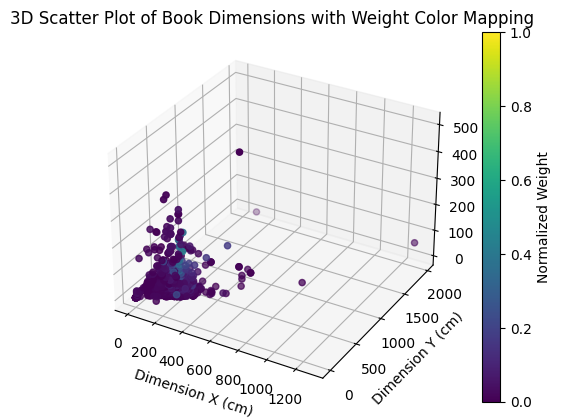

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data['dimension-x']
y = data['dimension-y']
z = data['dimension-z']
weight = data['weight']

# Normalize the weight values
normalized_weight = (weight - weight.min()) / (weight.max() - weight.min())
sc = ax.scatter(x, y, z, c=normalized_weight, cmap='viridis')
ax.set_xlabel('Dimension X (cm)')
ax.set_ylabel('Dimension Y (cm)')
ax.set_zlabel('Dimension Z (mm)')
cbar = plt.colorbar(sc)
cbar.set_label('Normalized Weight')
plt.title('3D Scatter Plot of Book Dimensions with Weight Color Mapping')
plt.show()


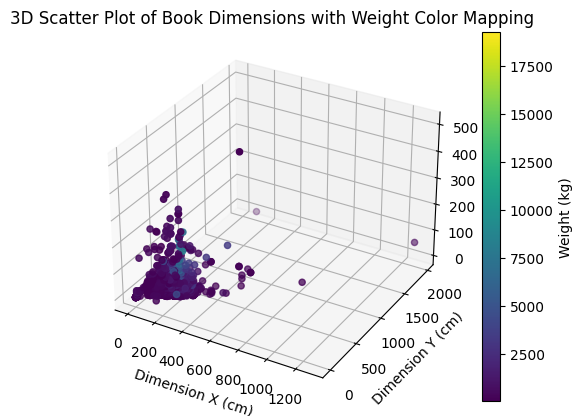

In [ ]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data['dimension-x']
y = data['dimension-y']
z = data['dimension-z']
weight = data['weight']
sc = ax.scatter(x, y, z, c=weight, cmap='viridis')
ax.set_xlabel('Dimension X (cm)')
ax.set_ylabel('Dimension Y (cm)')
ax.set_zlabel('Dimension Z (mm)')
cbar = plt.colorbar(sc)
cbar.set_label('Weight (kg)')
plt.title('3D Scatter Plot of Book Dimensions with Weight Color Mapping')
plt.show()
